## Importing data and libraries 

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/6. Advanced Analytics/Project_Waste in the world'

In [3]:
#Import dataframes

df_all = pd.read_csv(os.path.join(path,'Prepared data','Complete_Dataset_without_0_emissions_with_extreme_outliers.csv'), index_col = False)


## Data cleaning and wrangling

In [4]:
df_all.head()

,Unnamed: 0.1,Unnamed: 0,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country,GDP per cap. category,Country category by emissions
0,0,0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
1,1,1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
2,2,2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
3,3,3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN,55483.0,High GDP per cap.,Low emissions country
4,4,4,Afganistan,2015,solid-waste-disposal,ch4,21000.0,NaN,NaN,NaN,NaN,2373000.0,NaN,Insignificant emissions country


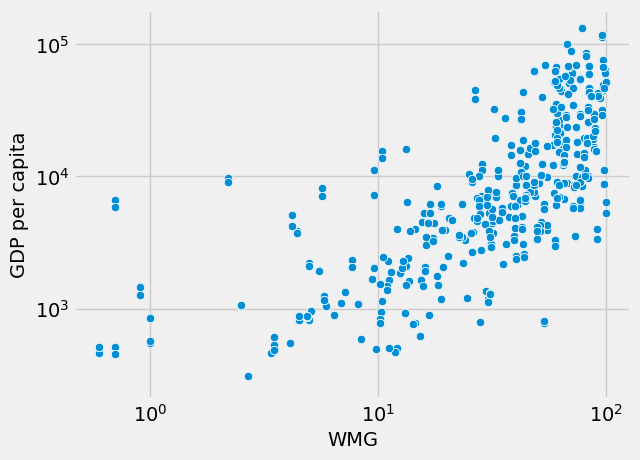

In [5]:
sns.scatterplot(data=df_all, x='WMG', y='GDP per capita')
plt.xscale('log')
plt.yscale('log')

In [6]:
df_all_sub_types = df_all[['Country','Year', 'Gas type', 'Emissions quantity, tonnes', 'Total population, thousands']]

In [8]:
df_all_sub_types['Emissions per capita'] = df_all_sub_types['Emissions quantity, tonnes'] / df_all_sub_types['Total population, thousands']


In [10]:
grouped_by_country_types = df_all_sub_types.groupby(['Country', 'Year', 'Gas type'])['Emissions quantity, tonnes','Emissions per capita'].sum()


In [12]:
grouped_by_country_types = grouped_by_country_types.reset_index()

In [13]:
grouped_by_country_types.head()

,Country,Year,Gas type,"Emissions quantity, tonnes",Emissions per capita
0,Afganistan,2015,ch4,21000.0,0.0
1,Afganistan,2015,co2e_100yr,588000.0,0.0
2,Afganistan,2015,co2e_20yr,1764000.0,0.0
3,Afganistan,2016,ch4,21800.0,0.0
4,Afganistan,2016,co2e_100yr,610400.0,0.0


In [14]:
max_em_types = grouped_by_country_types.sort_values(by='Emissions per capita', ascending=False)


In [16]:
specific_values = ['Kuwait', 'Trinidad and Tobago', 'Saint Pierre and Miquelon', 'Finland', 'Greenland', 'New Zealand', 'Hong Kong', 'Iceland', 'Bahamas', 'Israel']


In [17]:
subset_top_10 = grouped_by_country_types[grouped_by_country_types['Country'].isin(specific_values)]


In [20]:
subset_top_10.to_csv(os.path.join(path, 'Prepared Data', 'top 10_types.csv'))

In [ ]:
df_all_sub.head()

In [ ]:
df_all_sub['Emissions per capita'] = df_all_sub['Emissions quantity, tonnes'] / df_all_sub['Total population, thousands']


In [ ]:
df_all_sub.head()

In [ ]:
#Grouping the data on Emissions by country 
grouped_by_country = df_all_sub.groupby(['Country', 'Year'])['Emissions quantity, tonnes','Emissions per capita'].sum()

In [ ]:
grouped_by_country

In [ ]:
#Reseting the index
grouped_by_country = grouped_by_country.reset_index()

In [ ]:
grouped_by_country

In [ ]:
# Check for missing values (you shouldn't have any)

grouped_by_country.isnull().sum() 

In [ ]:
grouped_by_country.to_csv(os.path.join(path, 'Prepared Data', 'grouped_by_country_6.7.csv'))

In [ ]:
top_10_countries = grouped_by_country.nlargest(10, 'Emissions quantity, tonnes')


In [ ]:
df_sorted = grouped_by_country.sort_values(by='Emissions per capita', ascending=False)


In [ ]:
grouped_by_country_emissions = grouped_by_country.groupby(['Country'])['Emissions per capita'].sum()

In [ ]:
grouped_by_country_emissions

In [ ]:
grouped_by_country_emissions = grouped_by_country_emissions.reset_index()

In [ ]:
grouped_by_country_emissions

In [ ]:
df_sorted_1 = grouped_by_country_emissions.sort_values(by='Emissions per capita', ascending=False)


In [ ]:
df_sorted_1

In [ ]:
top_10_values = df_sorted_1.nlargest(10, 'Emissions per capita')


In [ ]:
top_10_values

In [ ]:
top_10_values.to_csv(os.path.join(path, 'Prepared Data', 'top_10_emissions_per_capita_6.7.csv'))

In [ ]:
total_sum = grouped_by_country['Emissions quantity, tonnes'].sum()


In [ ]:
grouped_by_country['% of total emissions'] = (grouped_by_country['Emissions quantity, tonnes'] / total_sum) * 100


In [ ]:
grouped_by_country

In [ ]:
grouped_by_country_percentage = grouped_by_country.groupby(['Country', 'Year'])['Emissions quantity, tonnes', 'Emissions per capita', '% of total emissions'].sum()

In [ ]:
grouped_by_country_percentage = grouped_by_country_percentage.reset_index()

In [ ]:
grouped_by_country_percentage

In [ ]:
grouped_by_country_percentage.to_csv(os.path.join(path, 'Prepared Data', 'percentage of all emissions_6.7.csv'))